<a href="https://colab.research.google.com/github/KRISHNPRIY2820/KRISHNPRIY2820/blob/main/SVM_TRAIL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Support Vector Machine (SVM)
# The most elegant algorithm (Mathematical Design) --> Not much on this!
# Supervised Machine Learning --> Classification and Regression

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Binary Classification
# Two classes --> {Diabetic v/s Non-Diabetic}

# Age, BMI,  Blood Sugar, Cholestrol,....

# Let's keep the problem simple!


# BMI, Blood Sugar --> Heathy or Diabetic

X1 = np.random.random(20).reshape(10,2)  +  2 # 10 healthy individuals
y1 = np.zeros(10)
X2 = np.random.random(20).reshape(10,2)  +  3.5 # Diabetic individuals
y2 = np.ones(10)

X = np.vstack((X1,X2))
y = np.hstack((y1,y2))

In [ ]:
X.shape # 20 individuals

(20, 2)

In [ ]:
df = pd.DataFrame(X, columns = ['BMI', 'Blood Sugar'])
df['Y'] = y
df.head()

,BMI,Blood Sugar,Y
0,2.009724,2.541866,0.0
1,2.313032,2.040872,0.0
2,2.355805,2.743336,0.0
3,2.640932,2.495104,0.0
4,2.088170,2.974769,0.0


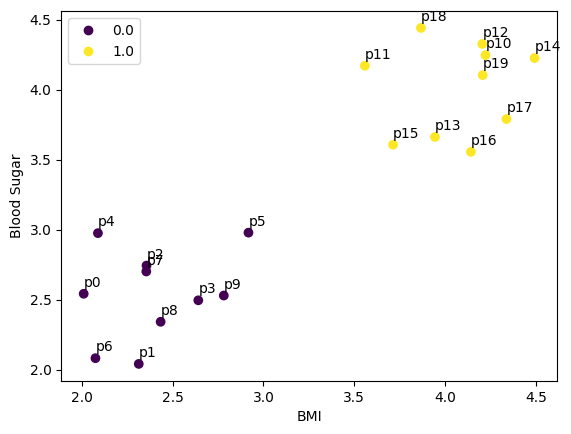

In [ ]:
scatter = plt.scatter(df['BMI'],df['Blood Sugar'], c = y)
plt.legend(handles = scatter.legend_elements()[0], labels = list(np.unique(y)))
for i in range(X.shape[0]):
  plt.annotate('p'+str(i), xy = (X[i,0], X[i,1]), xytext = (X[i,0], X[i,1] + 0.05))
plt.xlabel('BMI')
plt.ylabel('Blood Sugar')
plt.show()


# Equation of a line Y  - mx - c = 0
# m1.(BMI) + m2(Blood Sugar) + c = 0

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 1, penalty = None)
model.fit(X,y)

model.coef_

array([[38.39165635, -4.85216051]])

In [ ]:
m1 = model.coef_[0][0]
m1

38.391656345313116

In [ ]:
m2 = model.coef_[0][1]
m2

-4.852160512436548

In [ ]:
model.intercept_

array([-106.79832945])

In [ ]:
c = model.intercept_[0]
c

-106.79832944729627

In [ ]:
# m1.(BMI) + m2(Blood Sugar) + c = 0

# Figure out the points (x1, x2) that give me the value as 0

# (Blood Sugar) =  - c/m2 - (m1/m2).(BMI)
# BMI = 1
- c/m2 - (m1/m2)*(1)

-14.098188410430847

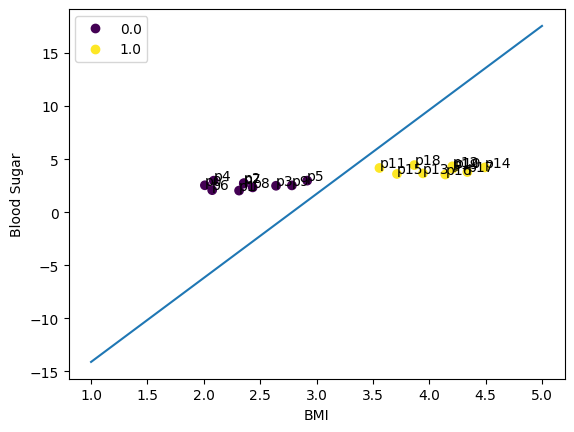

In [ ]:
scatter = plt.scatter(df['BMI'],df['Blood Sugar'], c = y)
plt.legend(handles = scatter.legend_elements()[0], labels = list(np.unique(y)))
for i in range(X.shape[0]):
  plt.annotate('p'+str(i), xy = (X[i,0], X[i,1]), xytext = (X[i,0], X[i,1] + 0.05))

plt.plot([5,1], [17.550934694142185,-14.098188410430847])

plt.xlabel('BMI')
plt.ylabel('Blood Sugar')
plt.show()

In [ ]:
# Do you think that it is wise to use all the points to generate the best-separating line?

# One of the tightest (worst) that works

# Let's make two tightest parallel separtors. The line in the middle would a better seperator than both.

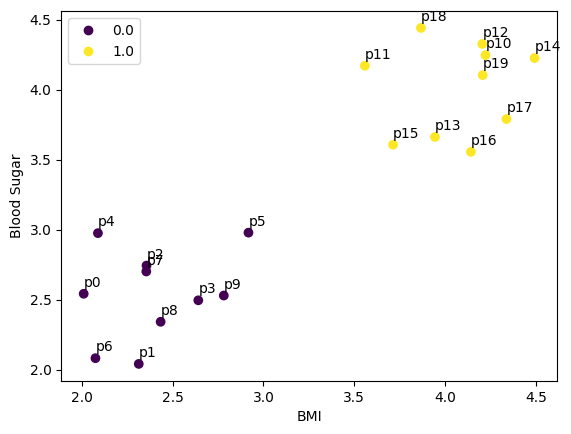

In [ ]:
scatter = plt.scatter(df['BMI'],df['Blood Sugar'], c = y)
plt.legend(handles = scatter.legend_elements()[0], labels = list(np.unique(y)))
for i in range(X.shape[0]):
  plt.annotate('p'+str(i), xy = (X[i,0], X[i,1]), xytext = (X[i,0], X[i,1] + 0.05))
plt.xlabel('BMI')
plt.ylabel('Blood Sugar')
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 1, C = 10) # Hard Margin
model.fit(X,y)

SVC(C=10, kernel='linear', random_state=1)

In [ ]:
model.support_vectors_

array([[2.91728723, 2.97827258],
       [3.71369765, 3.60615873]])

In [ ]:
model.coef_

array([[1.54866954, 1.22096364]])

In [ ]:
m1 = model.coef_[0][0]
m2 = model.coef_[0][1]
m1, m2

(1.5486695373154564, 1.2209636380286844)

In [ ]:
c = model.intercept_[0]
c

-9.15427748343273

In [ ]:
model.support_vectors_

array([[2.91728723, 2.97827258],
       [2.78138449, 2.52926592],
       [3.94452311, 3.66144201],
       [3.71369765, 3.60615873]])

In [ ]:
- c/m2 - (m1/m2)*(1)

6.229184645004632

In [ ]:
m1.X1 + m2.X2 + c = 1
m1.X1 + m2.X2 + c = 0
m1.X1 + m2.X2 + c = -1

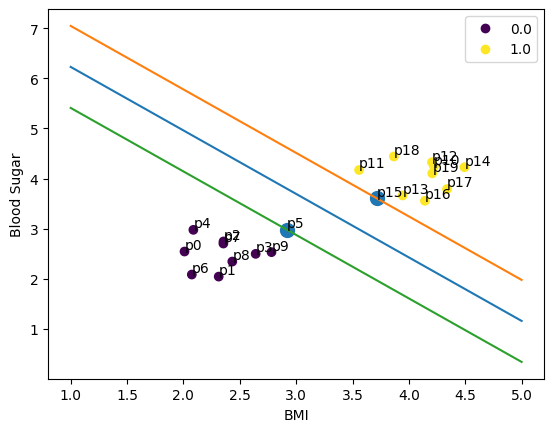

In [ ]:
# Linear SVC

scatter = plt.scatter(df['BMI'],df['Blood Sugar'], c = y)
plt.legend(handles = scatter.legend_elements()[0], labels = list(np.unique(y)))
for i in range(X.shape[0]):
  plt.annotate('p'+str(i), xy = (X[i,0], X[i,1]), xytext = (X[i,0], X[i,1] + 0.05))

plt.plot([5,1], [1.1555870731199462,6.229184645004632])# Middle Line
plt.plot([5,1], [1.9746122830881614,7.048209854972847]) # Left Margin
plt.plot([5,1], [0.3365618631517302, 5.410159435036416]) # Right Margin

plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], marker = 'o', s = 100)

plt.xlabel('BMI')
plt.ylabel('Blood Sugar')
plt.show()

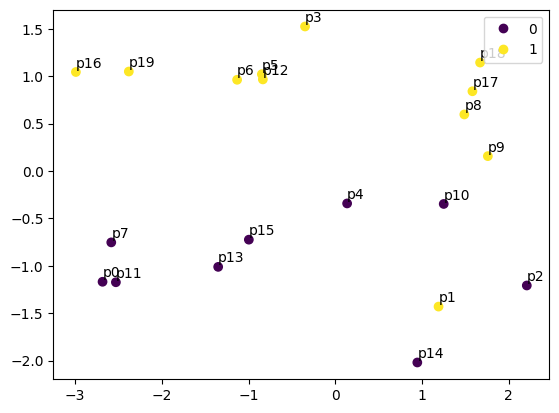

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 20, n_features = 2, n_redundant = 0, n_informative = 2, flip_y = 0.15, random_state = 1)

scatter = plt.scatter(X[:,0],X[:,1], c = y)
plt.legend(handles = scatter.legend_elements()[0], labels = list(np.unique(y)))
for i in range(X.shape[0]):
  plt.annotate('p'+str(i), xy = (X[i,0], X[i,1]), xytext = (X[i,0], X[i,1] + 0.05))

plt.show()

In [ ]:
# Soft Margin

model = SVC(kernel = 'linear', random_state = 1, C = 1) # Soft Margin
model.fit(X,y)

SVC(C=1, kernel='linear', random_state=1)

In [ ]:
m1 = model.coef_[0][0]
m2 = model.coef_[0][1]
m1, m2

(0.11543222100955308, 1.1542229092396399)

In [ ]:
c = model.intercept_[0]
c

0.14039383516176554

In [ ]:
- c/m2 - (m1/m2)*(-3)

0.17839086905885018

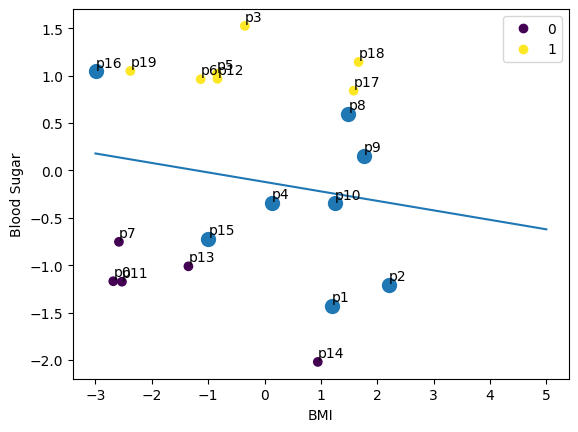

In [ ]:
scatter = plt.scatter(X[:,0],X[:,1], c = y)
plt.legend(handles = scatter.legend_elements()[0], labels = list(np.unique(y)))

for i in range(X.shape[0]):
  plt.annotate('p'+str(i), xy = (X[i,0], X[i,1]), xytext = (X[i,0], X[i,1] + 0.05))

plt.plot([5,-3], [-0.6216779570613705,0.17839086905885018])# Middle Line
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], marker = 'o', s = 100)

plt.xlabel('BMI')
plt.ylabel('Blood Sugar')
plt.show()

In [ ]:
model.support_vectors_

array([[ 2.20709937, -1.20825938],
       [ 0.13574494, -0.34279335],
       [ 1.24939741, -0.34831546],
       [-0.9970991 , -0.7250477 ],
       [ 1.18968955, -1.43090867],
       [ 1.48686048,  0.59580588],
       [ 1.75810823,  0.15620461],
       [-2.99091327,  1.04362151]])